In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Lecture 04

## Implementation of Neural Network
- One hidden layer
- Tanh Activation
- Moons dataset


## 1. Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

## 2. Setup Global Parameters

In [3]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [4]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;">
DataFrames are easier to visualize


In [5]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [8]:
data_df['target'].unique()

array([0, 1], dtype=int64)

### 4.1 Different ways of plotting data

<Axes: xlabel='A', ylabel='B'>

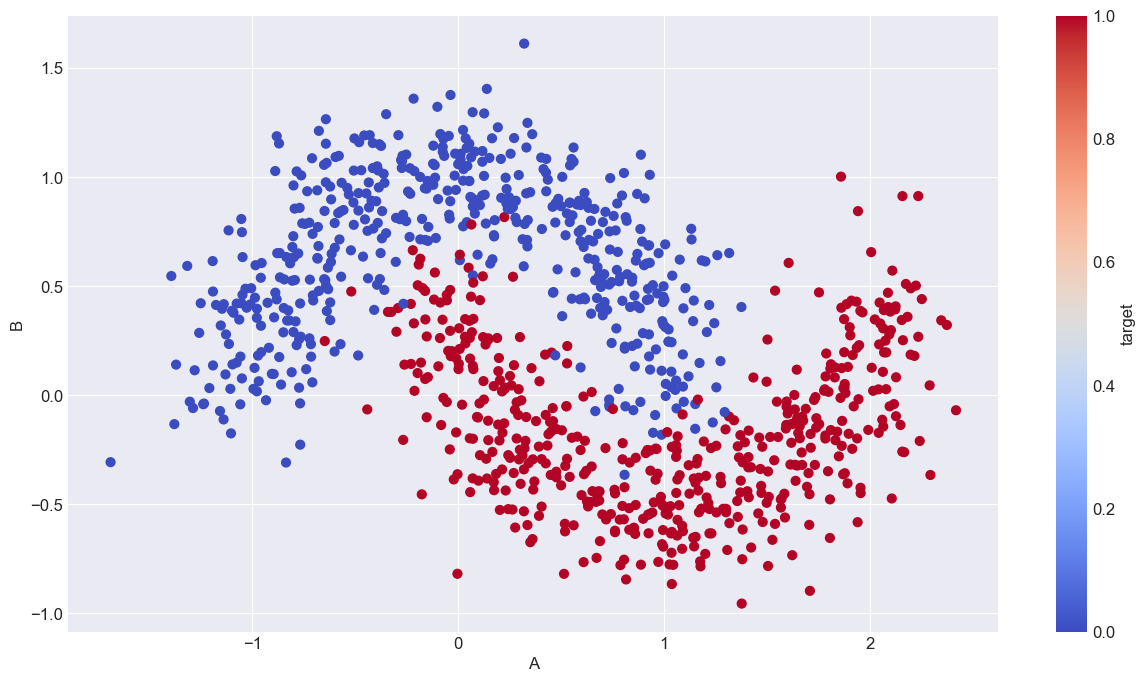

In [9]:
data_df.plot.scatter('A', 'B', s=40, c = 'target', cmap = CMAP)

<div style="font-family: Arial; font-size:1.2em;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training. Note that the data is already random.
</div>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [11]:
data_train = data_df.to_numpy()[:900]
data_test = data_df.to_numpy()[900:]
data_train.shape, data_test.shape

((900, 3), (100, 3))

# Over to Perceptron

<div style="font-family: Arial; font-size:1.1em;">

Our output is binary. To keep the code in line with what we discussed in the lecture, we will simply output 1 for positive values of 'z' and zero for negative values.
</div>

<img src="../../images/dnn_nb_s04_fig1.png" width='500' align = 'left'>
<img src="../../images/dnn_nb_s04_fig2.png" width='500' align = 'center'>

<h4>Since there are 2 input nodes connected to 4 hidden layer perceptron since each input node is connected to every hidden layer node with means the w1 would be matrix of size(2X4) </h4>


$$
\begin{aligned}
  X &= \begin{bmatrix}
     & \\
    \end{bmatrix}_{1X2}
  \\  
  w_1 &= \begin{bmatrix}
     & \\
     & \\
    \end{bmatrix}_{2X4}
  \\
  b_1 &= \begin{bmatrix}
     & \\
    \end{bmatrix}_{4X1}
  \\
  w_2 &= \begin{bmatrix}
     & \\
    \end{bmatrix}_{1X4}
  \\
  b_2 &= \begin{bmatrix}
     & \\
    \end{bmatrix}_{1X1}
\end{aligned}
$$
<br/>

#### 1st Node 
$$
\begin{aligned}
z_1 & = w_1 . x_1 + b_1 \\
 a_1 &= tanh(z_1)\\
\end{aligned}

\\

\begin{equation*}
    a_1  = \begin{cases}
      -1, & \text{for z=-$\infty$}\  \\
      1, & \text{for z=$\infty$}\
    \end{cases}
\end{equation*}
$$



#### 2nd Node
$$
\begin{aligned}
  z_2 & = a_1 . x_2 + b_2 \\
  a_2 &= \sigma(z_2)\\
\end{aligned}
$$

$$
\begin{equation*}
    a_2  = \begin{cases}
      0.0 - 0.499999999...9, & \text{for z<0}\  \\
      0.5, & \text{for z=0} \\
      0.5000000...1 - 1.0, & \text{for z>0}\
    \end{cases}
\end{equation*}
$$

## Sigmoid Function

In [12]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
fn_sigmoid(np.array([-np.inf, 0, 0.5, 1, np.inf]))

array([0.        , 0.5       , 0.62245933, 0.73105858, 1.        ])

In [14]:
fn_sigmoid(np.array([-np.inf, 0, -0.5, -1, np.inf]))

array([0.        , 0.5       , 0.37754067, 0.26894142, 1.        ])

## Tanh Activation Function

In [15]:
def fn_actv(z):
    return np.tanh(z)


def fn_actv_prime(a):
    return 1- np.tanh(a)**2


In [16]:
fn_actv(np.array([[-1, 0, 1], [-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [17]:
np.tanh(0.5)

0.46211715726000974

In [18]:
(1- np.power(np.tanh(0.5), 2))

0.7864477329659274

In [19]:
fn_actv_prime(0.5)

0.7864477329659274

## 5. Prediction

In [20]:
nn_input_dim = X_train.shape[1]
nn_hdim = 4
nn_output_dim = 1

hist = {}
nn_input_dim, nn_hdim, nn_output_dim

(2, 4, 1)

#### Forward Propagation

$$

\begin{equation*}
    w_1 = \begin{bmatrix}
      w_{1X1}, & w_{1X2}, & w_{1X3}, & w_{1X4}  \\
      w_{2X1}, & w_{2X2}, & w_{2X3}, & w_{2X4}  \\
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}    
    w_2 = \begin{bmatrix}
      w_{1X1}, & w_{1X2}, & w_{1X3}, & w_{1X4}  \\  
    \end{bmatrix}
\end{equation*}
$$       

$$
\begin{equation*}
    b_1 = \begin{bmatrix}
      b_{1X1}, & b_{1X2}, & b_{1X3}, & b_{1X4}  \\
        
    \end{bmatrix}
\end{equation*}
$$ 

$$
\begin{equation*}    
    b_2 = \begin{bmatrix}
      b_{1X1}
    \end{bmatrix}
\end{equation*}
$$

$$ 
\begin{equation*}
    x = \begin{bmatrix}
      x_{1X1} & x_{1X2}\\
    \end{bmatrix}

\end{equation*}

$$

$$
\begin{equation*}
    z_1 =  X_{1X2} \circ  W1_{2X4} +  b_{1X4}
  \end{equation*}
$$

$$
\begin{equation*}
    z_2 =  a1_{1X4} \circ  W2_{4X1} +  b2_{1X1}
  \end{equation*}
$$


In [21]:
def forward_propagation(model, X):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    
    # Layer 1
    z1 = X.dot(W1) + b1  # Agg
    a1 = fn_actv(z1)  # Activation
    
    
    # Layer 2
    z2 = a1.dot(W2) + b2  # Agg
    a2 = fn_sigmoid(z2)  # Activation
    
    return z1, a1, z2, a2

In [22]:
# A function to make predictions

def predict(model, X):
    ####--------------------
    #### Forward Propagation
    ####--------------------

    z1, a1, z2, a2 = forward_propagation(model, X)

    return a2 >= 0.5

<img src="../../images/dnn_nb_s04_fig4.png"  align = 'left'>

#### Back-propagation - Estimate Perceptron weights 
$
\begin{aligned}
    \partial{z_2}  & = a_2 - y \\
    \partial{b_2}  & = \sum{\partial{z_2}} \\
    \partial{w_2}  & = a_1^T \circ \partial{z_2}\\
    \partial{a_1}  & = \partial{z_2} \circ W_2^T\\
\end{aligned}
$

$
\begin{aligned}
    \partial{z_1}  & = \partial{a_1} \circ \partial{\tanh{z_1}} \\
    \partial{b_2}  & = \sum{\partial{z_1}} \\
    \partial{w_2}  & = X^T \circ \partial{z_1}\\
\end{aligned}
$

$
\begin{aligned}
b & = b -  \frac{1}{m} (\alpha \circ \partial{b}) \\
w_1  & = w_1 - \frac{1}{m}(\alpha \circ \partial{w_1} )\\
w_2  & = w_2 - \frac{1}{m}(\alpha \circ \partial{w_2} )\\
\end{aligned}
$

In [23]:
def backward_propagation(X, y, agg, model):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    z1, a1, z2, a2 = agg['z1'], agg['a1'], agg['z2'], agg['a2']

    ## We need to make sure that dW1, dW2 are same as W1, W2 respectively
    ## So that they can adjust each Weight of their layer
    
    
    # Layer 2
    dz2 = a2 - y  ## Ypred-Y  ## dim 1X1
    ##Check if z2 is same dim as dz2 that is 1x1
    assert z2.shape == dz2.shape, f"error z2 {z2.shape}/{dz2.shape}"

    dW2 = (a1.T).dot(dz2)
    ## a1 dim is 1X4
    # Make sure dw2 dim is same as W2 that is 4X1
    # That's why we make sure to Transpose a1 which is 1X4
    assert W2.shape == dW2.shape, f"error W2 {W2.shape}/{dW2.shape}"
    db2 = np.sum(dz2, axis=0, keepdims=True)
    ## adjust Bias as sum of gradient/slope/dz
    ## bias dim is 1X1
    # Make sure db2 dim is same as b2 that is 1X1
    assert b2.shape == db2.shape, f"error b2 {b2.shape}/{db2.shape}"
    # Adjust act_func
    # makes sure to keep dimesion same as other a1 matrix
    # that's why we transpose W2 4X1
    da1 = dz2.dot(W2.T)
    
    
    # Layer 1
    dz1 = da1 * fn_actv_prime(z1)
    ## 1-tanh(a)**2 is diff/gradient of tanh
    # makes sure to keep dimesion same as other da1 matrix

    dW1 = (X.T).dot(dz1)
    ## Dim of x is 1X2, Dim of dz1 is 1X4
    ## to make sure we get same dim as W1 ie 4X1, we transpose X
    ## Dim of dW1 2x4
    assert W1.shape == dW1.shape, f"error W1 {W1.shape}/{dW1.shape}"

    db1 = np.sum(dz1, axis=0, keepdims=True)
    ## adjust Bias as sum of gradient/slope/dz
    ## bias dim is 1X4
    # Make sure db1 dim is same as b1 that is 1X4
    assert b1.shape == db1.shape, f"error b1 {b1.shape}/{db1.shape}"
    return dz1, da1, dW1, db1, dz2, dW2, db2

In [24]:
def calculate_loss(model, X, y):
    m = X.shape[0]

    ####--------------------
    #### Forward Propagation
    ####--------------------

    z1, a1, z2, a2 = forward_propagation(model, X)

    data_loss = -(y * np.log(a2)).sum()

    return 1.0 / m * data_loss

$$

\begin{equation*}
    w_1 = \begin{bmatrix}
      2.60661943, & -1.22178467, & 3.17555961, & -1.30304895  \\
      0.4419304, &  -0.3441531,  & 3.73488786, &  3.01160266  \\
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}    
    w_2 = \begin{bmatrix}
      5.49452151, \\ 4.57146275, \\ 3.98356891 \\  -6.37677479 \\  
    \end{bmatrix}
\end{equation*}
$$       

$$
\begin{equation*}
    b_1 = \begin{bmatrix}
      -3.37744408, &  
      1.70449199,  &  
      0.06904934,  &  
      -2.37750153, &  
    \end{bmatrix}
\end{equation*}
$$ 

$$
\begin{equation*}    
    b_2 = \begin{bmatrix}
      -0.00627053 &  \\
    \end{bmatrix}
\end{equation*}
$$

$$ 
\begin{equation*}
    x = \begin{bmatrix}
      2.15811685, &   -0.25867999 &  \\
    \end{bmatrix}

\end{equation*}

$$

In [25]:
# Function to train the model


def build_model(X, y, alpha=ALPHA, epochs=EPOCHS):
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    ## because the W1 matrix would be inp_dim X hidden_dim
    ## since each input perceptron would be connected to every hidden layer perceptron
    ## in this case its 2X4 matrix

    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    ## because the W1 matrix would be hidden_dim X out_dim
    ## since every hidden layer perceptron is connected to output perceptron
    ## in this case its 4X1 matrix

    b1 = np.zeros((1, nn_hdim))
    ## initialising bias for each hidden layer perceptron as 0
    ## in this case its 1x4 matrix as there are 1 bias for each hidden layer perceptron

    b2 = np.zeros((1, nn_output_dim))
    ## initialising bias for output layer perceptron as 0
    ## in this case its 1x4 matrix as there are 1 bias for output layer perceptron

    curr_loss = 0

    loss, epoch = [], []

    m = X.shape[0]

    model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    for i in range(epochs):
        ####--------------------
        #### Forward Propagation
        ####--------------------

        z1, a1, z2, a2 = forward_propagation(model, X)

        ####--------------------
        #### Back Propagation
        ####--------------------
        agg = {"z1": z1, "a1": a1, "z2": z2, "a2": a2}
        
        dz1, da1, dW1, db1, dz2, dW2, db2= backward_propagation(X, y, agg, model)

        W1 += -alpha * dW1 / m  # gradient update
        W2 += -alpha * dW2 / m  # gradient update
        b1 += -alpha * db1 / m  # gradient update
        b2 += -alpha * db2 / m  # gradient update

        model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

        if i % 100 == 0:
            curr_loss = calculate_loss(model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
            print(f"epoch: {i}; Current Loss = {curr_loss : .4f}")

    hist["loss"] = loss
    hist["epoch"] = epoch

    return model

In [26]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [27]:
# model = build_model(X_train, y_train)

In [28]:
model = build_model (X_train, y_train)

epoch: 0; Current Loss =  0.3055
epoch: 100; Current Loss =  0.2568
epoch: 200; Current Loss =  0.1963
epoch: 300; Current Loss =  0.1635
epoch: 400; Current Loss =  0.1528
epoch: 500; Current Loss =  0.1492
epoch: 600; Current Loss =  0.1470
epoch: 700; Current Loss =  0.1446
epoch: 800; Current Loss =  0.1417
epoch: 900; Current Loss =  0.1380
epoch: 1000; Current Loss =  0.1335
epoch: 1100; Current Loss =  0.1285
epoch: 1200; Current Loss =  0.1233
epoch: 1300; Current Loss =  0.1181
epoch: 1400; Current Loss =  0.1131
epoch: 1500; Current Loss =  0.1084
epoch: 1600; Current Loss =  0.1040
epoch: 1700; Current Loss =  0.1000
epoch: 1800; Current Loss =  0.0962
epoch: 1900; Current Loss =  0.0927
epoch: 2000; Current Loss =  0.0894
epoch: 2100; Current Loss =  0.0863
epoch: 2200; Current Loss =  0.0833
epoch: 2300; Current Loss =  0.0803
epoch: 2400; Current Loss =  0.0774
epoch: 2500; Current Loss =  0.0744
epoch: 2600; Current Loss =  0.0714
epoch: 2700; Current Loss =  0.0685
epoc

epoch: 5300; Current Loss =  0.0349
epoch: 5400; Current Loss =  0.0345
epoch: 5500; Current Loss =  0.0342
epoch: 5600; Current Loss =  0.0339
epoch: 5700; Current Loss =  0.0336
epoch: 5800; Current Loss =  0.0333
epoch: 5900; Current Loss =  0.0331
epoch: 6000; Current Loss =  0.0329
epoch: 6100; Current Loss =  0.0326
epoch: 6200; Current Loss =  0.0324
epoch: 6300; Current Loss =  0.0322
epoch: 6400; Current Loss =  0.0320
epoch: 6500; Current Loss =  0.0319
epoch: 6600; Current Loss =  0.0317
epoch: 6700; Current Loss =  0.0315
epoch: 6800; Current Loss =  0.0314
epoch: 6900; Current Loss =  0.0313
epoch: 7000; Current Loss =  0.0311
epoch: 7100; Current Loss =  0.0310
epoch: 7200; Current Loss =  0.0309
epoch: 7300; Current Loss =  0.0308
epoch: 7400; Current Loss =  0.0306
epoch: 7500; Current Loss =  0.0305
epoch: 7600; Current Loss =  0.0304
epoch: 7700; Current Loss =  0.0303
epoch: 7800; Current Loss =  0.0303
epoch: 7900; Current Loss =  0.0302
epoch: 8000; Current Loss = 

<Axes: xlabel='epoch'>

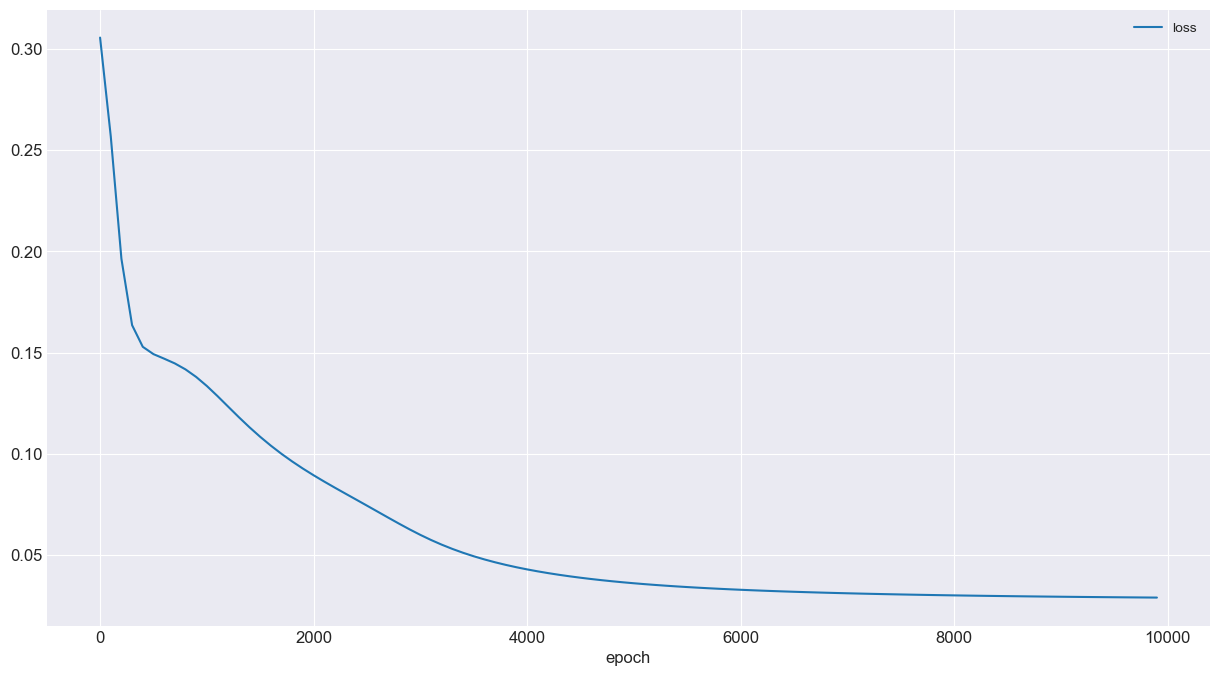

In [29]:
pd.DataFrame(hist).plot(x = 'epoch')

In [30]:
model

{'W1': array([[ 2.91292296,  1.04997537,  3.59684279,  3.14153665],
        [-1.38243701, -0.7722428 ,  3.08996819, -1.17370331]]),
 'b1': array([[-3.75187066,  0.88000385, -2.33102131,  1.63207776]]),
 'W2': array([[ 6.157214  ],
        [ 2.51121114],
        [-6.3595762 ],
        [ 4.66817439]]),
 'b2': array([[-0.50983511]])}

In [31]:
predict(model,X_train[0])

array([[ True]])

In [32]:
###-----------------------------------
### Function to plot Decision boundary
###-----------------------------------

def fn_plot_decision_boundary(pred_func, X_tr, y_tr, X_ts, y_ts):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )

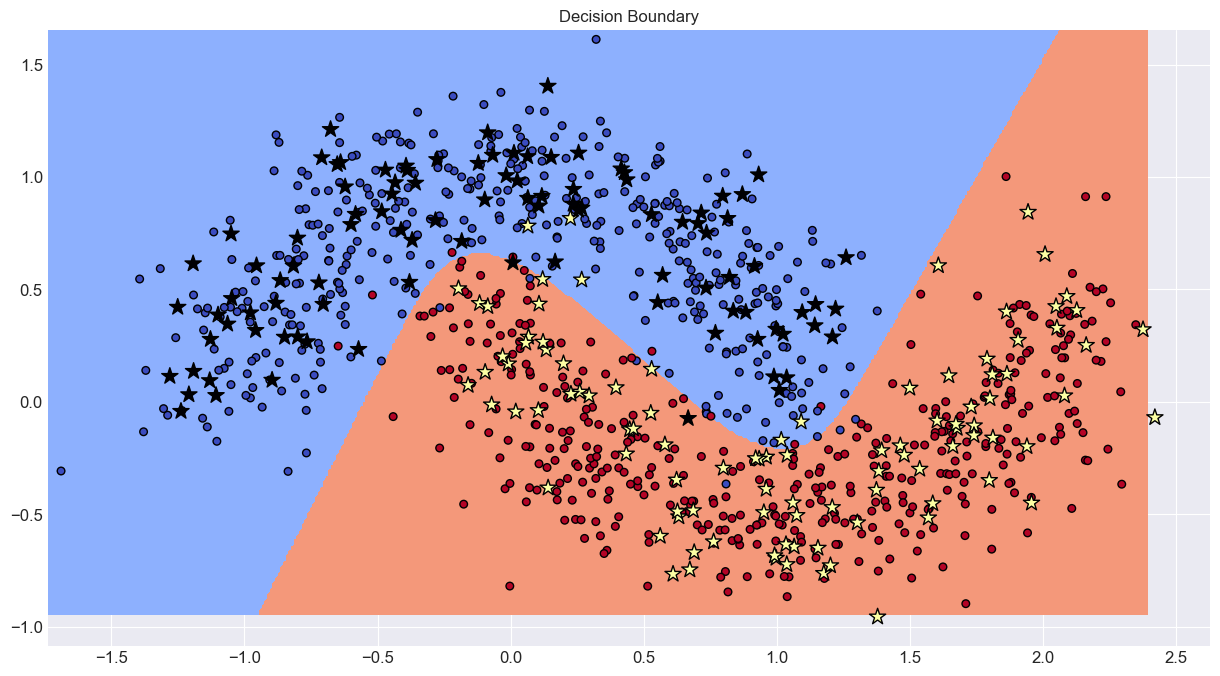

In [33]:
fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");

## Question
<div style="font-family: Arial; font-size:1.2em;">
Why do we keep training and not stop at min training error? Hold on! We would get to that eventually.
</div>

## 7. Predictions

### Train Set

In [34]:
predictions = []  # list

for row in X:  # iterate ove all rows
    prediction = predict(model, row)  # make prediction

    predictions.append(prediction)  # collect them in a list

### Test Set

In [35]:
predictions =[] # list

for row in data_test[:,:-1]: # iterate ove all rows
    
    prediction = predict(model, row) # make prediction
    
    if prediction > 0.5:
        y_pred = 1
    else:
        y_pred = 0
    
    predictions.append(y_pred) # collect them in a list

In [36]:
data_test[:,:-1].shape

(100, 2)

In [37]:
accuracy_score(data_test[:, -1], predictions) # calculate accuracy

0.98

In [38]:
cm  = confusion_matrix(data_test[:, -1], predictions) # calculate accuracy)
cm

array([[57,  1],
       [ 1, 41]], dtype=int64)

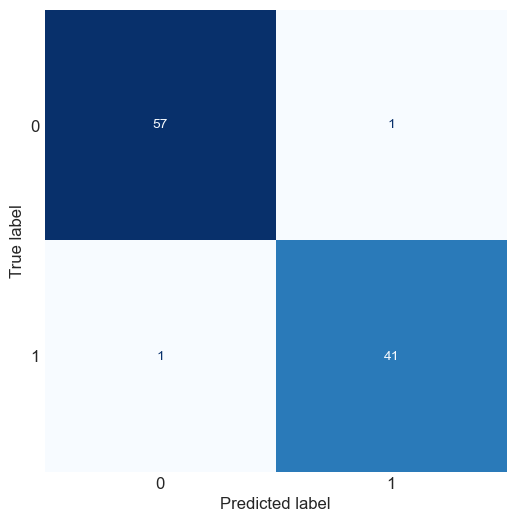

In [39]:
fig, ax = plt.subplots (figsize=(6,6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(ax = ax, cmap ='Blues', colorbar=False)

plt.grid()

In [40]:
def fn_plot_decision_boundary(X: np.ndarray):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5))
    
    # Small increment to create object function surface
    dm = 0.05
    
    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()] 

    # add another column filled with 1 to make it work with the predict function
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    # list to collect predictions
    y_pred = []
    
    # Iterate over rows
    for row in (XX[:,:-1]):
        ## Changes for sigmoid
        pred = predict(model, row)

        y_p = 0
        
        if pred >= 0.5:
            y_p = 1

        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2],
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

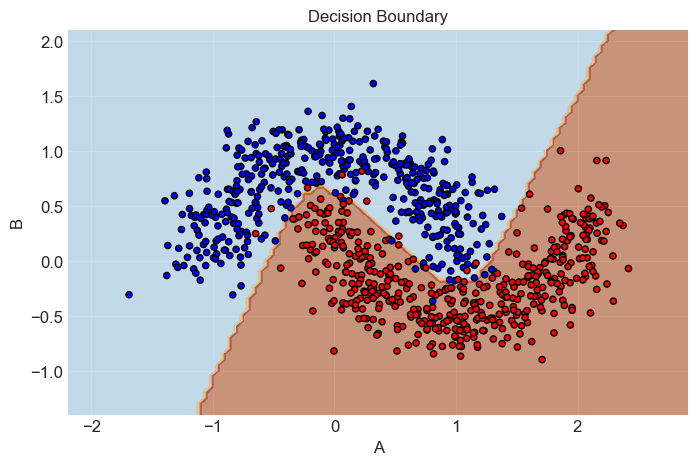

In [41]:
fn_plot_decision_boundary(data_train)

## Tracking
<div style="font-family: Arial; font-size:1.2em;">
Lets track the results across various implementations...

 |#|Implementation|Training Accuracy|Testing Accuracy|Remarks|
 |:-:|---|---|---|---|
 |1|Simple Perceptron|0.83111|0.89000||

## Notes:
<img src="../../images/dnn_nb_s03_fig1.png" width='350' align = 'left'>
<img src="../../images/dnn_nb_s03_fig2.png" width='550' align = 'right'>

## A note on Loss Function

    In logistic regression we are looking for if it is correct class or not.  
    For example, we want to know if there is a car in the picture or not. So the output is probability of a car in the picture.
    Mathematically speaking:
$\hat{y} = p(y=1|x)$ i.e. given training sample $x$, we want to know probability of $y$ being 1.
    Alternatively:
    If there is a car in the picture.  $\Rightarrow$  $y$ = 1 then $p(y|x)$ = $\hat{y}$.
    If there is no car in the picture.$\Rightarrow$ $y$ = 0 then $p(y|x)$ = 1 - $\hat{y}$.
    We can summarize two equations as: $p(y|x)$ = $\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}$
    Above equation is $\hat{y}$ for y = 1 and (1 - $\hat{y}$) for y = 0.
    Taking log of above equation:

$
\begin{aligned}
log [ p(y|x) ] & = log[\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}]\\
& = y * log(\hat{y}) + (1-y) * log(1 - \hat{y})\\
\end{aligned}
$
Since we aim to minimize above function, add negative sign and our loss function becomes

$
\begin{aligned}
L(\hat{y},y) =  -[y * log\hat{y} + (1-y) * log(1-\hat{y})]\\
\text{or}\\
L(a,y) =  - [ y * log ( a ) + ( 1 - y ) * log( 1 - a ) ]\\
\end{aligned}
$

|Case| y |Loss| a |-log(a)|-log(1-a)|
|:-: |:-:|:-: |:-:|  :-: |   :-:  |
| 1  | 0 | -log( 1 - a )| 0.000001 |13.8155|**1 e-6**|
| 2  | 0 | -log( 1 - a )| 0.999999 |1 e-6|**13.8155**|
| 3  | 1 | -log( a )| 0.000001 |**13.8155**|1 e-6|
| 4  | 1 | -log( a )| 0.999999 |**1 e-6**|13.8155|



<div style="font-family: Arial; font-size:1.2em;">
    For binary classification the error = - $y * log(a)$
    We want to sum it up for all samples in the dataset. Hence:

$
\begin{aligned}
p(\text{all ys | all rows of x}) & =  \Pi_{i=0}^m p(y|x)\\
log [ p(\text{all ys | all rows of x})] & =  log [ \Pi_{i=0}^m p(y|x) ]\\
& =  \sum_{i=0}^m log [ p(y|x) ] \\
& =  \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\text{Divide it by m to better scale the costs}\\
& = \frac{1}{m} * \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\end{aligned}
$

### Introducing $\mathrm{sigmoid}$ function for our binary output.
$$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + b_1 \\
a & = \hat{y} = \sigma(z)\\
dz & = (a - y) \\
db & = dz\\
b & = b - \alpha . db\\
dw_1 & = x_1. dz\\
dw_2 & = x_2.dz\\
w_1 & = w_1 - \alpha . dw_1\\
w_2 & = w_1 - \alpha . dw_2\\
\end{aligned}
$$
### Sigmoid function
$$
\begin{align}
a &= \sigma(z)\\
&= \dfrac{1}{1 + e^{-z}}\\
\end{align}
$$
    <h3>Derivative of sigmoid function</h3>
$$
\begin{align}
\partial{a} &= \partial{(\sigma(z))}\\
&= \dfrac{\partial}{\partial{z}} \left[ \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{\partial}{\partial{z}} \left( 1 + \mathrm{e}^{-z} \right)^{-1} \\
&= -(1 + e^{-z})^{-2}(-e^{-z}) \\
&= \dfrac{e^{-z}}{\left(1 + e^{-z}\right)^2} \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{e^{-z}}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{(1 + e^{-z}) - 1}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ \dfrac{1 + e^{-z}}{1 + e^{-z}} - \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ 1 - \dfrac{1}{1 + e^{-z}} \right] \\
&= \sigma(z) \circ (1 - \sigma(z))\\
&= a \circ (1 - a)
\end{align}
$$
